# CCADMACL (Midterm Exam)

## Import the libraries

In [620]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [621]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

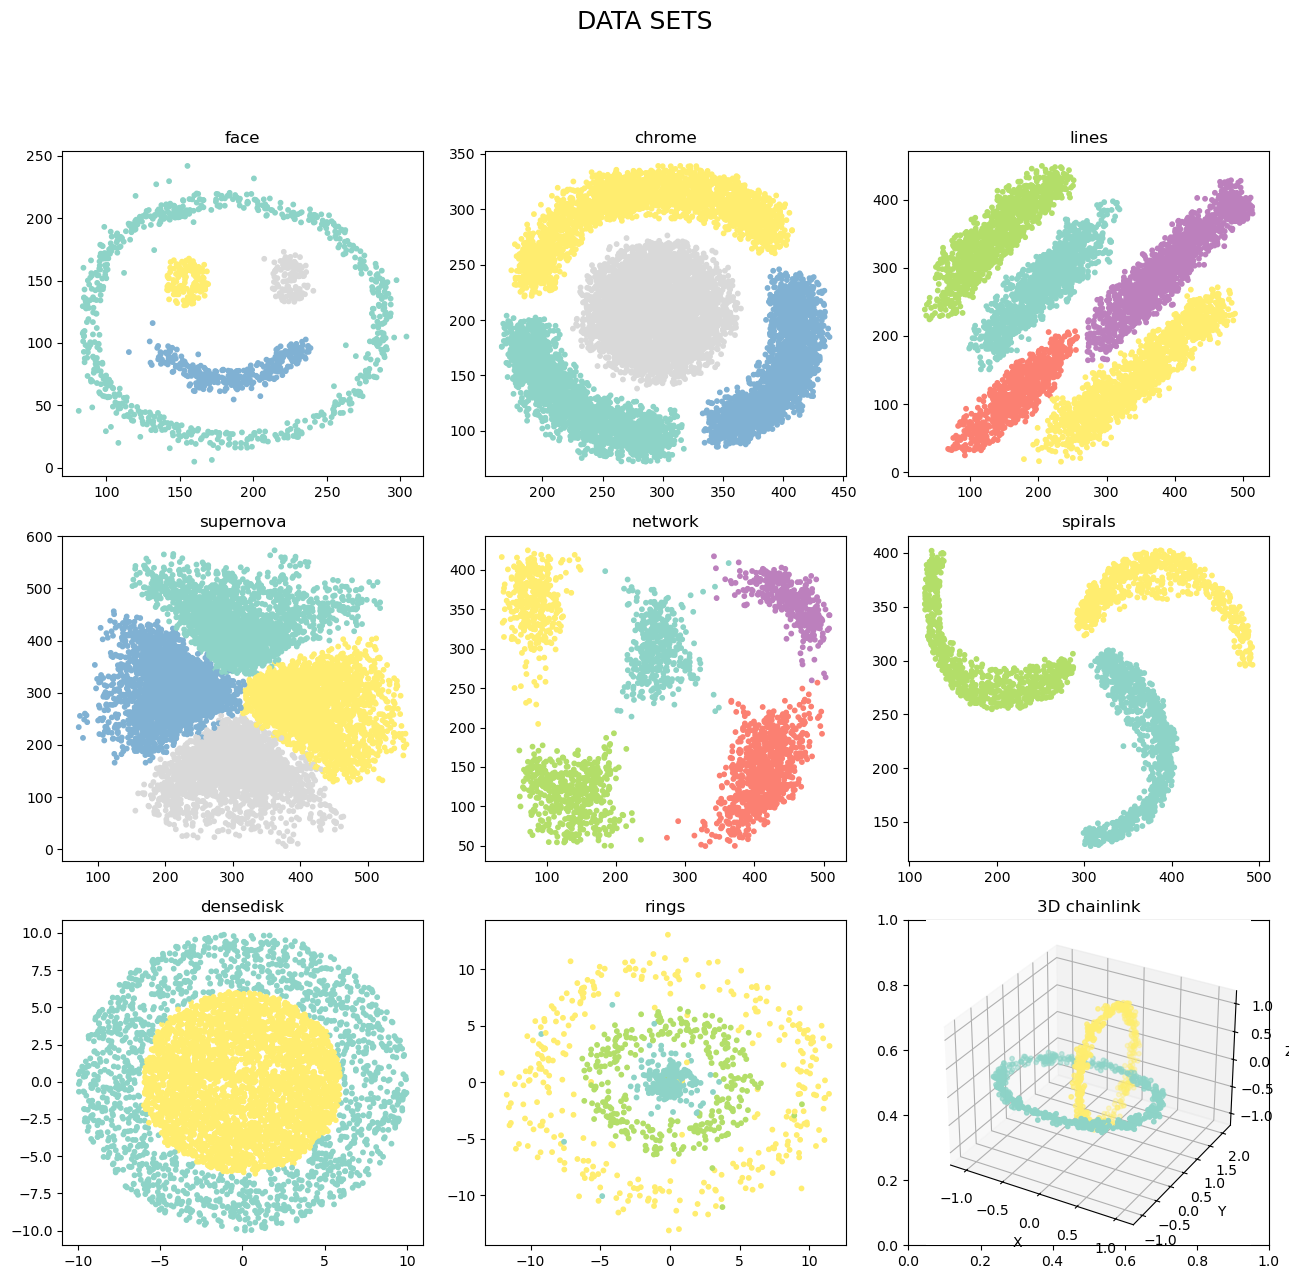

In [622]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [623]:
k_mean_face_df = face_df.copy()
k_mean_chrome_df = chrome_df.copy()
k_mean_lines2_df = lines2_df.copy()
k_mean_supernova_df = supernova_df.copy()
k_mean_network_df = network_df.copy()
k_mean_spirals_df = spirals_df.copy()
k_mean_densedisk_df = densedisk_df.copy()
k_mean_rings_df = rings_df.copy()
k_mean_chainlink_df = chainlink_df.copy()

In [624]:
k_mean_face_df.head()

Unnamed: 0.1           x           y  color
0          1087  230.378162  141.270406      2
1           464  281.264318  127.419565      0
2          1237  157.530566  158.890252      3
3            68  107.354057  175.958260      0
4          1151  148.118641  161.809148      3

2. Drop the "color" column on all datasets

In [625]:
k_mean_face_df = k_mean_face_df.drop('color', axis=1)
k_mean_chrome_df = k_mean_chrome_df.drop('color', axis=1)
k_mean_lines2_df = k_mean_lines2_df.drop('color', axis=1)
k_mean_supernova_df = k_mean_supernova_df.drop('color', axis=1)
k_mean_network_df = k_mean_network_df.drop('color', axis=1)
k_mean_spirals_df = k_mean_spirals_df.drop('color', axis=1)
k_mean_densedisk_df = k_mean_densedisk_df.drop('color', axis=1)
k_mean_rings_df = k_mean_rings_df.drop('color', axis=1)
k_mean_chainlink_df = k_mean_chainlink_df.drop('color', axis=1)

In [626]:
k_mean_face_df.head()

Unnamed: 0.1           x           y
0          1087  230.378162  141.270406
1           464  281.264318  127.419565
2          1237  157.530566  158.890252
3            68  107.354057  175.958260
4          1151  148.118641  161.809148

3. Train a K-means model for each dataset.

In [627]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_k_means_face, X_test_face = train_test_split(k_mean_face_df, test_size=0.2, random_state=42)
X_k_means_chrome, X_test_chrome = train_test_split(k_mean_chrome_df, test_size=0.2, random_state=42)
X_k_means_lines2, X_test_lines2 = train_test_split(k_mean_lines2_df, test_size=0.2, random_state=42)
X_k_means_supernova, X_test_supernova = train_test_split(k_mean_supernova_df, test_size=0.2, random_state=42)
X_k_means_network, X_test_network = train_test_split(k_mean_network_df, test_size=0.2, random_state=42)
X_k_means_spirals, X_test_spirals = train_test_split(k_mean_spirals_df, test_size=0.2, random_state=42)
X_k_means_densedisk, X_test_densedisk = train_test_split(k_mean_densedisk_df, test_size=0.2, random_state=42)
X_k_means_rings, X_test_rings = train_test_split(k_mean_rings_df, test_size=0.2, random_state=42)
X_k_means_chainlink, X_test_chainlink = train_test_split(k_mean_chainlink_df, test_size=0.2, random_state=42)

kmeans_face = KMeans(n_clusters=4, random_state=42).fit(X_k_means_face)
kmeans_chrome = KMeans(n_clusters=4, random_state=42).fit(X_k_means_chrome)
kmeans_lines2 = KMeans(n_clusters=5, random_state=42).fit(X_k_means_lines2)
kmeans_supernova = KMeans(n_clusters=4, random_state=42).fit(X_k_means_supernova)
kmeans_network = KMeans(n_clusters=5, random_state=42).fit(X_k_means_network)
kmeans_spirals = KMeans(n_clusters=3, random_state=42).fit(X_k_means_spirals)
kmeans_densedisk = KMeans(n_clusters=2, random_state=42).fit(X_k_means_densedisk)
kmeans_rings = KMeans(n_clusters=3, random_state=42).fit(X_k_means_rings)
kmeans_chainlink = KMeans(n_clusters=2, random_state=42).fit(X_k_means_chainlink)

4. Add a "Cluster" column for each data set

In [628]:
# add 'cluster' column to the dataframes

X_k_means_face['cluster'] = kmeans_face.labels_
X_k_means_chrome['cluster'] = kmeans_chrome.labels_
X_k_means_lines2['cluster'] = kmeans_lines2.labels_
X_k_means_supernova['cluster'] = kmeans_supernova.labels_
X_k_means_network['cluster'] = kmeans_network.labels_
X_k_means_spirals['cluster'] = kmeans_spirals.labels_
X_k_means_densedisk['cluster'] = kmeans_densedisk.labels_
X_k_means_rings['cluster'] = kmeans_rings.labels_
X_k_means_chainlink['cluster'] = kmeans_chainlink.labels_

5. Plot the Correct cluster and the K-means cluster

Text(0.5, 0, 'Z')

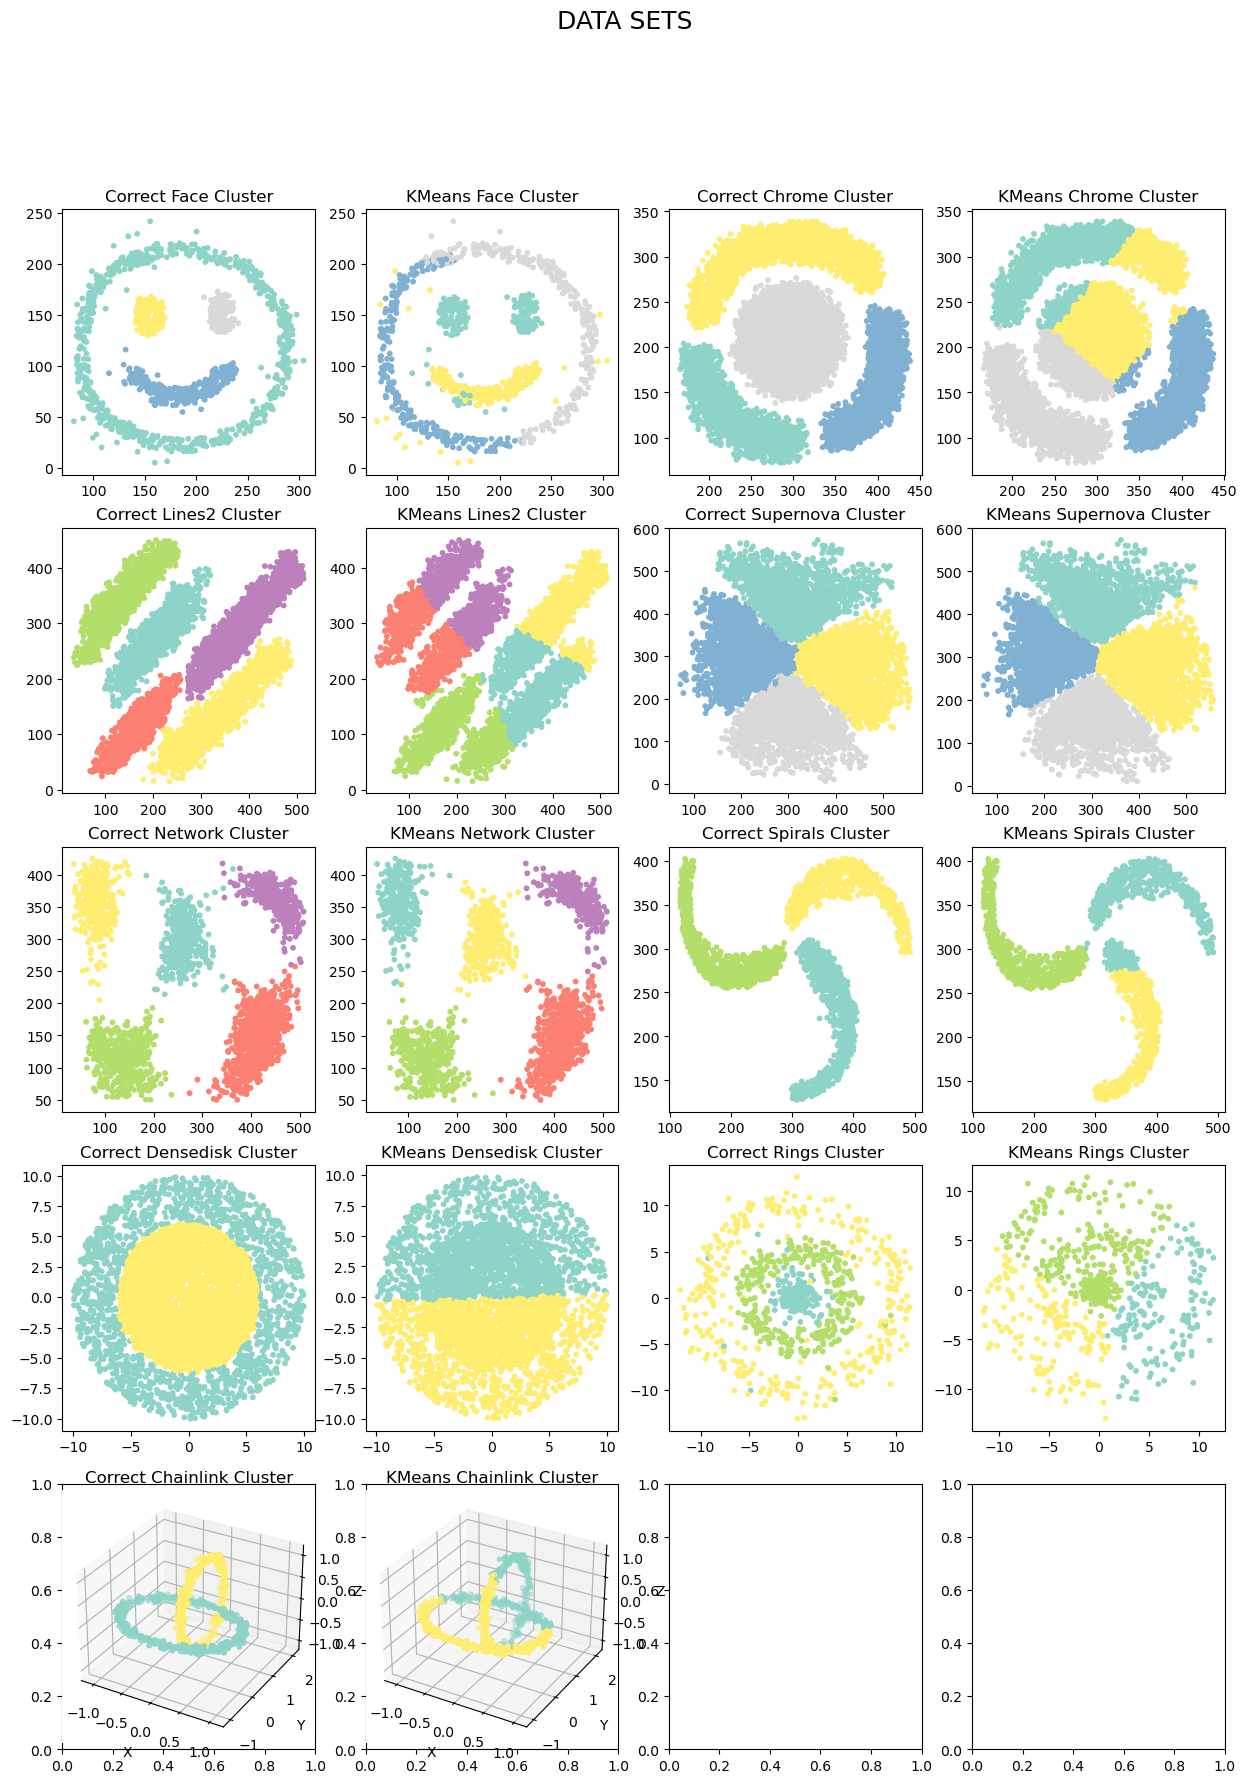

In [629]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
fig.suptitle('DATA SETS\n', size=18)

# Face Scatter Plots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Correct Face Cluster")
axes[0, 1].scatter(X_k_means_face['x'], X_k_means_face['y'], c=X_k_means_face['cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("KMeans Face Cluster")

# Chrome Scatter Plots
axes[0, 2].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("Correct Chrome Cluster")
axes[0, 3].scatter(X_k_means_chrome['x'], X_k_means_chrome['y'], c=X_k_means_chrome['cluster'], s=10, cmap="Set3")
axes[0, 3].set_title("KMeans Chrome Cluster")

# Lines2 Scatter Plots
axes[1, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Correct Lines2 Cluster")
axes[1, 1].scatter(X_k_means_lines2['x'], X_k_means_lines2['y'], c=X_k_means_lines2['cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("KMeans Lines2 Cluster")

# Supernova Scatter Plots
axes[1, 2].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("Correct Supernova Cluster")
axes[1, 3].scatter(X_k_means_supernova['x'], X_k_means_supernova['y'], c=X_k_means_supernova['cluster'], s=10, cmap="Set3")
axes[1, 3].set_title("KMeans Supernova Cluster")

# Network Scatter Plots
axes[2, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Correct Network Cluster")
axes[2, 1].scatter(X_k_means_network['x'], X_k_means_network['y'], c=X_k_means_network['cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("KMeans Network Cluster")

# Spirals Scatter Plots
axes[2, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[2, 2].set_title("Correct Spirals Cluster")
axes[2, 3].scatter(X_k_means_spirals['x'], X_k_means_spirals['y'], c=X_k_means_spirals['cluster'], s=10, cmap="Set3")
axes[2, 3].set_title("KMeans Spirals Cluster")

# Densedisk Scatter Plots
axes[3, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Correct Densedisk Cluster")
axes[3, 1].scatter(X_k_means_densedisk['x'], X_k_means_densedisk['y'], c=X_k_means_densedisk['cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("KMeans Densedisk Cluster")

# Rings Scatter Plots
axes[3, 2].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[3, 2].set_title("Correct Rings Cluster")
axes[3, 3].scatter(X_k_means_rings['x'], X_k_means_rings['y'], c=X_k_means_rings['cluster'], s=10, cmap="Set3")
axes[3, 3].set_title("KMeans Rings Cluster")

# Chainlink 3D Scatter Plots
ax3d_correct = fig.add_subplot(5, 4, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("Correct Chainlink Cluster")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(5, 4, 18, projection='3d')
ax3d_kmeans.scatter(X_k_means_chainlink['x'], X_k_means_chainlink['y'], X_k_means_chainlink['z'], c=X_k_means_chainlink['cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("KMeans Chainlink Cluster")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [630]:
algo_face_df = face_df.copy()
algo_chrome_df = chrome_df.copy()
algo_lines2_df = lines2_df.copy()
algo_supernova_df = supernova_df.copy()
algo_network_df = network_df.copy()
algo_spirals_df = spirals_df.copy()
algo_densedisk_df = densedisk_df.copy()
algo_rings_df = rings_df.copy()
algo_chainlink_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [631]:
algo_face_df = algo_face_df.drop('color', axis=1)
algo_chrome_df = algo_chrome_df.drop('color', axis=1)
algo_lines2_df = algo_lines2_df.drop('color', axis=1)
algo_supernova_df = algo_supernova_df.drop('color', axis=1)
algo_network_df = algo_network_df.drop('color', axis=1)
algo_spirals_df = algo_spirals_df.drop('color', axis=1)
algo_densedisk_df = algo_densedisk_df.drop('color', axis=1)
algo_rings_df = algo_rings_df.drop('color', axis=1)
algo_chainlink_df = algo_chainlink_df.drop('color', axis=1)

3. Train a Agglomerative Clustering model for each dataset.

In [632]:
X_agg_face, X_test_face = train_test_split(algo_face_df, test_size=0.2, random_state=42)
X_agg_chrome, X_test_chrome = train_test_split(algo_chrome_df, test_size=0.2, random_state=42)
X_agg_lines2, X_test_lines2 = train_test_split(algo_lines2_df, test_size=0.2, random_state=42)
X_agg_supernova, X_test_supernova = train_test_split(algo_supernova_df, test_size=0.2, random_state=42)
X_agg_network, X_test_network = train_test_split(algo_network_df, test_size=0.2, random_state=42)
X_agg_spirals, X_test_spirals = train_test_split(algo_spirals_df, test_size=0.2, random_state=42)
X_agg_densedisk, X_test_densedisk = train_test_split(algo_densedisk_df, test_size=0.2, random_state=42)
X_agg_rings, X_test_rings = train_test_split(algo_rings_df, test_size=0.2, random_state=42)
X_agg_chainlink, X_test_chainlink = train_test_split(algo_chainlink_df, test_size=0.2, random_state=42)

agg_face = AgglomerativeClustering(n_clusters=4).fit(X_agg_face)
agg_chrome = AgglomerativeClustering(n_clusters=4).fit(X_agg_chrome)
agg_lines2 = AgglomerativeClustering(n_clusters=5).fit(X_agg_lines2)
agg_supernova = AgglomerativeClustering(n_clusters=4).fit(X_agg_supernova)
agg_network = AgglomerativeClustering(n_clusters=5).fit(X_agg_network)
agg_spirals = AgglomerativeClustering(n_clusters=3).fit(X_agg_spirals)
agg_densedisk = AgglomerativeClustering(n_clusters=2).fit(X_agg_densedisk)
agg_rings = AgglomerativeClustering(n_clusters=3).fit(X_agg_rings)
agg_chainlink = AgglomerativeClustering(n_clusters=2).fit(X_agg_chainlink)

4. Add a "Cluster" column for each data set

In [633]:
X_agg_face['cluster'] = agg_face.labels_
X_agg_chrome['cluster'] = agg_chrome.labels_
X_agg_lines2['cluster'] = agg_lines2.labels_
X_agg_supernova['cluster'] = agg_supernova.labels_
X_agg_network['cluster'] = agg_network.labels_
X_agg_spirals['cluster'] = agg_spirals.labels_
X_agg_densedisk['cluster'] = agg_densedisk.labels_
X_agg_rings['cluster'] = agg_rings.labels_
X_agg_chainlink['cluster'] = agg_chainlink.labels_

5. Plot the Correct cluster and the Agglomerative cluster

Text(0.5, 0, 'Z')

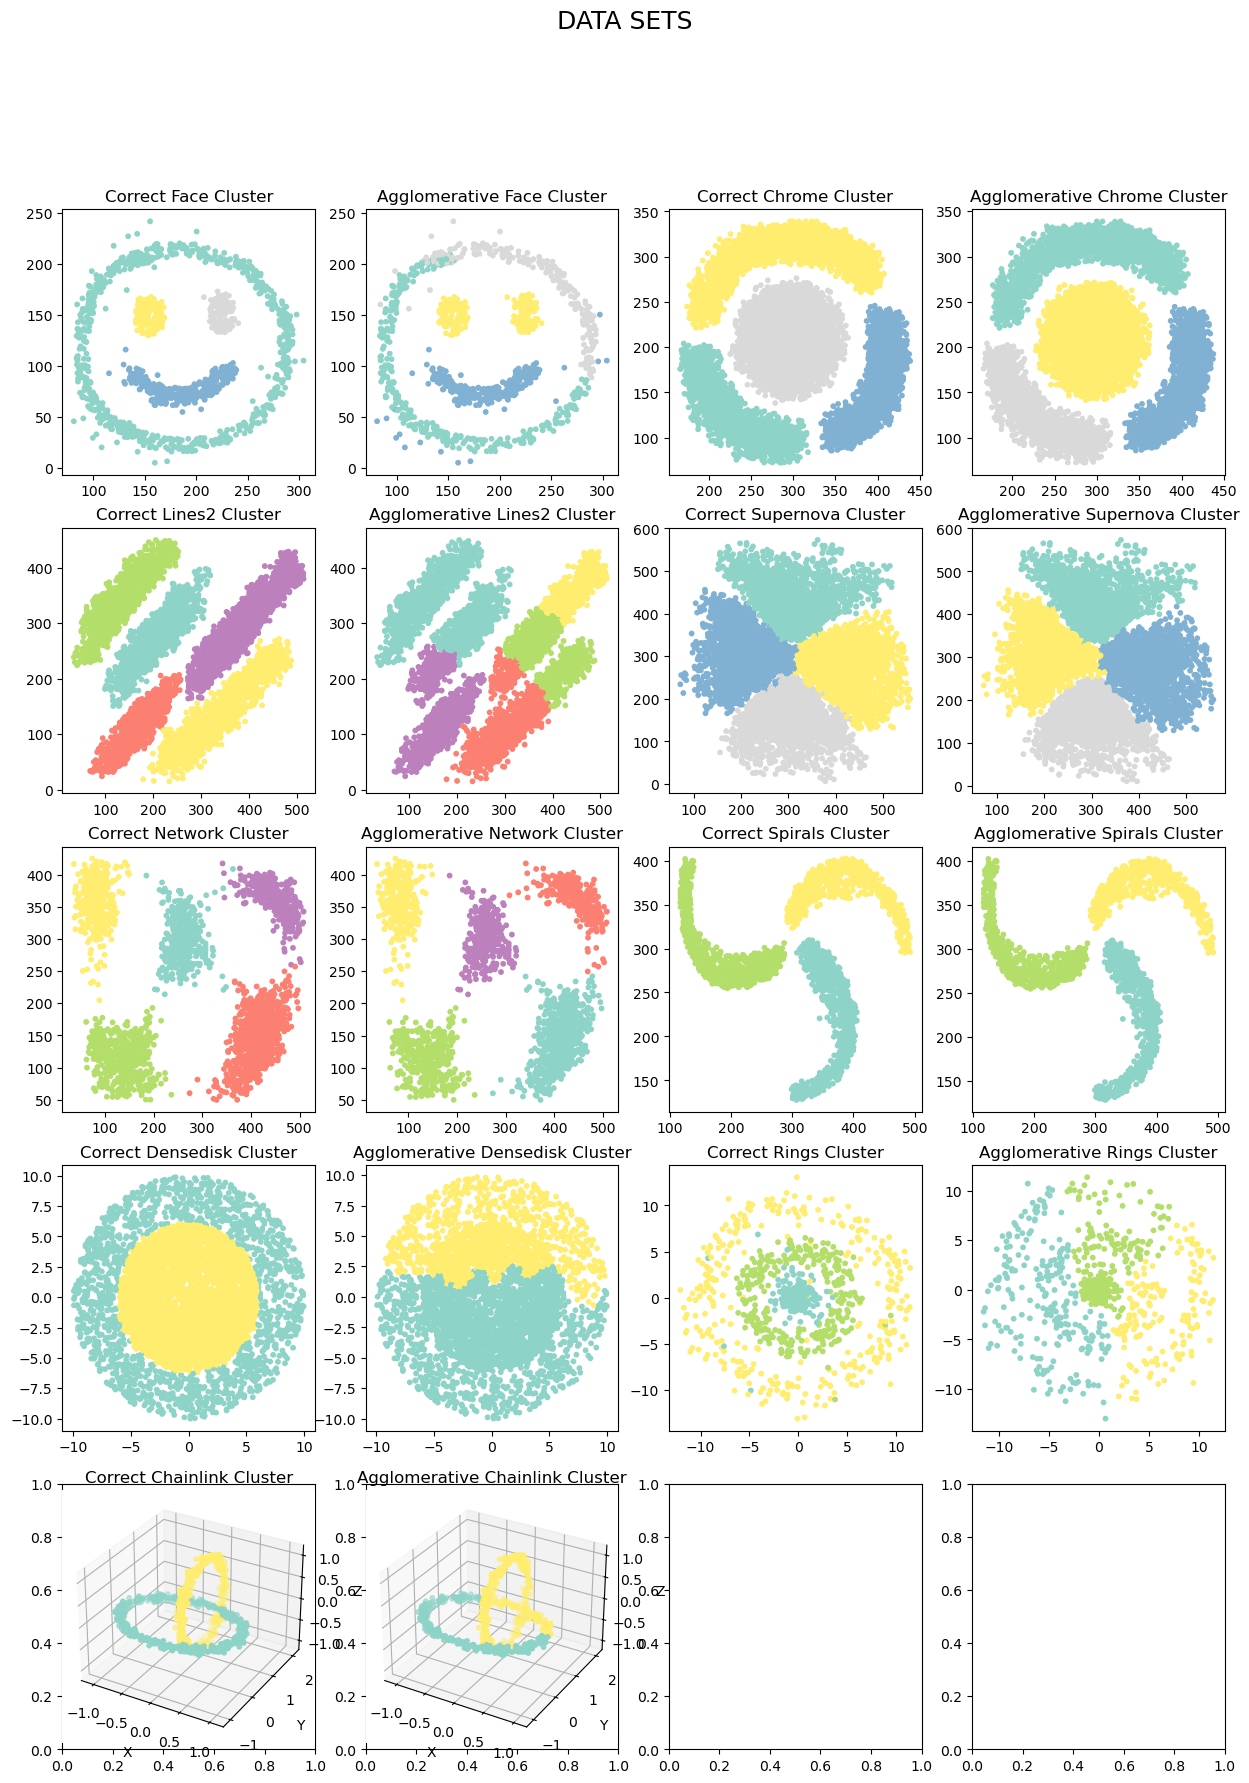

In [634]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
fig.suptitle('DATA SETS\n', size=18)

# Face Scatter Plots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Correct Face Cluster")
axes[0, 1].scatter(X_agg_face['x'], X_agg_face['y'], c=X_agg_face['cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("Agglomerative Face Cluster")

# Chrome Scatter Plots
axes[0, 2].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("Correct Chrome Cluster")
axes[0, 3].scatter(X_agg_chrome['x'], X_agg_chrome['y'], c=X_agg_chrome['cluster'], s=10, cmap="Set3")
axes[0, 3].set_title("Agglomerative Chrome Cluster")

# Lines2 Scatter Plots
axes[1, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Correct Lines2 Cluster")
axes[1, 1].scatter(X_agg_lines2['x'], X_agg_lines2['y'], c=X_agg_lines2['cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("Agglomerative Lines2 Cluster")

# Supernova Scatter Plots
axes[1, 2].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("Correct Supernova Cluster")
axes[1, 3].scatter(X_agg_supernova['x'], X_agg_supernova['y'], c=X_agg_supernova['cluster'], s=10, cmap="Set3")
axes[1, 3].set_title("Agglomerative Supernova Cluster")

# Network Scatter Plots
axes[2, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Correct Network Cluster")
axes[2, 1].scatter(X_agg_network['x'], X_agg_network['y'], c=X_agg_network['cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("Agglomerative Network Cluster")

# Spirals Scatter Plots
axes[2, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[2, 2].set_title("Correct Spirals Cluster")
axes[2, 3].scatter(X_agg_spirals['x'], X_agg_spirals['y'], c=X_agg_spirals['cluster'], s=10, cmap="Set3")
axes[2, 3].set_title("Agglomerative Spirals Cluster")

# Densedisk Scatter Plots
axes[3, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Correct Densedisk Cluster")
axes[3, 1].scatter(X_agg_densedisk['x'], X_agg_densedisk['y'], c=X_agg_densedisk['cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("Agglomerative Densedisk Cluster")

# Rings Scatter Plots
axes[3, 2].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[3, 2].set_title("Correct Rings Cluster")
axes[3, 3].scatter(X_agg_rings['x'], X_agg_rings['y'], c=X_agg_rings['cluster'], s=10, cmap="Set3")
axes[3, 3].set_title("Agglomerative Rings Cluster")

# Chainlink 3D Scatter Plots
ax3d_correct = fig.add_subplot(5, 4, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("Correct Chainlink Cluster")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_agg = fig.add_subplot(5, 4, 18, projection='3d')
ax3d_agg.scatter(X_agg_chainlink['x'], X_agg_chainlink['y'], X_agg_chainlink['z'], c=X_agg_chainlink['cluster'], cmap="Set3", s=10)
ax3d_agg.set_title("Agglomerative Chainlink Cluster")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")


## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [635]:
dbscan_face_df = face_df.copy()
dbscan_chrome_df = chrome_df.copy()
dbscan_lines2_df = lines2_df.copy()
dbscan_supernova_df = supernova_df.copy()
dbscan_network_df = network_df.copy()
dbscan_spirals_df = spirals_df.copy()
dbscan_densedisk_df = densedisk_df.copy()
dbscan_rings_df = rings_df.copy()
dbscan_chainlink_df = chainlink_df.copy()

In [636]:
dbscan_face_df.shape

(1273, 4)

2. Drop the "color" column on all datasets

In [637]:
dbscan_face_df = dbscan_face_df.drop('color', axis=1)
dbscan_chrome_df = dbscan_chrome_df.drop('color', axis=1)
dbscan_lines2_df = dbscan_lines2_df.drop('color', axis=1)
dbscan_supernova_df = dbscan_supernova_df.drop('color', axis=1)
dbscan_network_df = dbscan_network_df.drop('color', axis=1)
dbscan_spirals_df = dbscan_spirals_df.drop('color', axis=1)
dbscan_densedisk_df = dbscan_densedisk_df.drop('color', axis=1)
dbscan_rings_df = dbscan_rings_df.drop('color', axis=1)
dbscan_chainlink_df = dbscan_chainlink_df.drop('color', axis=1)

3. Train a DBSCAN Clustering model for each dataset.

In [638]:
X_dbscan_face, X_test_face = train_test_split(dbscan_face_df, test_size=0.2, random_state=42)
X_dbscan_chrome, X_test_chrome = train_test_split(dbscan_chrome_df, test_size=0.2, random_state=42)
X_dbscan_lines2, X_test_lines2 = train_test_split(dbscan_lines2_df, test_size=0.2, random_state=42)
X_dbscan_supernova, X_test_supernova = train_test_split(dbscan_supernova_df, test_size=0.2, random_state=42)
X_dbscan_network, X_test_network = train_test_split(dbscan_network_df, test_size=0.2, random_state=42)
X_dbscan_spirals, X_test_spirals = train_test_split(dbscan_spirals_df, test_size=0.2, random_state=42)
X_dbscan_densedisk, X_test_densedisk = train_test_split(dbscan_densedisk_df, test_size=0.2, random_state=42)
X_dbscan_rings, X_test_rings = train_test_split(dbscan_rings_df, test_size=0.2, random_state=42)
X_dbscan_chainlink, X_test_chainlink = train_test_split(dbscan_chainlink_df, test_size=0.2, random_state=42)

dbscan_face = DBSCAN(eps=20, min_samples=10).fit(X_dbscan_face)
dbscan_chrome = DBSCAN(eps=10, min_samples=10).fit(X_dbscan_chrome)
dbscan_lines2 = DBSCAN(eps=14, min_samples=7).fit(X_dbscan_lines2)
dbscan_supernova = DBSCAN(eps=9, min_samples=14).fit(X_dbscan_supernova)
dbscan_network = DBSCAN(eps=20, min_samples=4).fit(X_dbscan_network)
dbscan_spirals = DBSCAN(eps=20, min_samples=5).fit(X_dbscan_spirals)
dbscan_densedisk = DBSCAN(eps=1, min_samples=45).fit(X_dbscan_densedisk)
dbscan_rings = DBSCAN(eps=0.2, min_samples=3).fit(X_dbscan_rings)
dbscan_chainlink = DBSCAN(eps=0.5, min_samples=5).fit(X_dbscan_chainlink)

4. Add a "Cluster" column for each data set

In [639]:
X_dbscan_face['cluster'] = dbscan_face.labels_
X_dbscan_chrome['cluster'] = dbscan_chrome.labels_
X_dbscan_lines2['cluster'] = dbscan_lines2.labels_
X_dbscan_supernova['cluster'] = dbscan_supernova.labels_
X_dbscan_network['cluster'] = dbscan_network.labels_
X_dbscan_spirals['cluster'] = dbscan_spirals.labels_
X_dbscan_densedisk['cluster'] = dbscan_densedisk.labels_
X_dbscan_rings['cluster'] = dbscan_rings.labels_
X_dbscan_chainlink['cluster'] = dbscan_chainlink.labels_

5. Plot the Correct cluster and the DBSCAN cluster

Text(0.5, 0, 'Z')

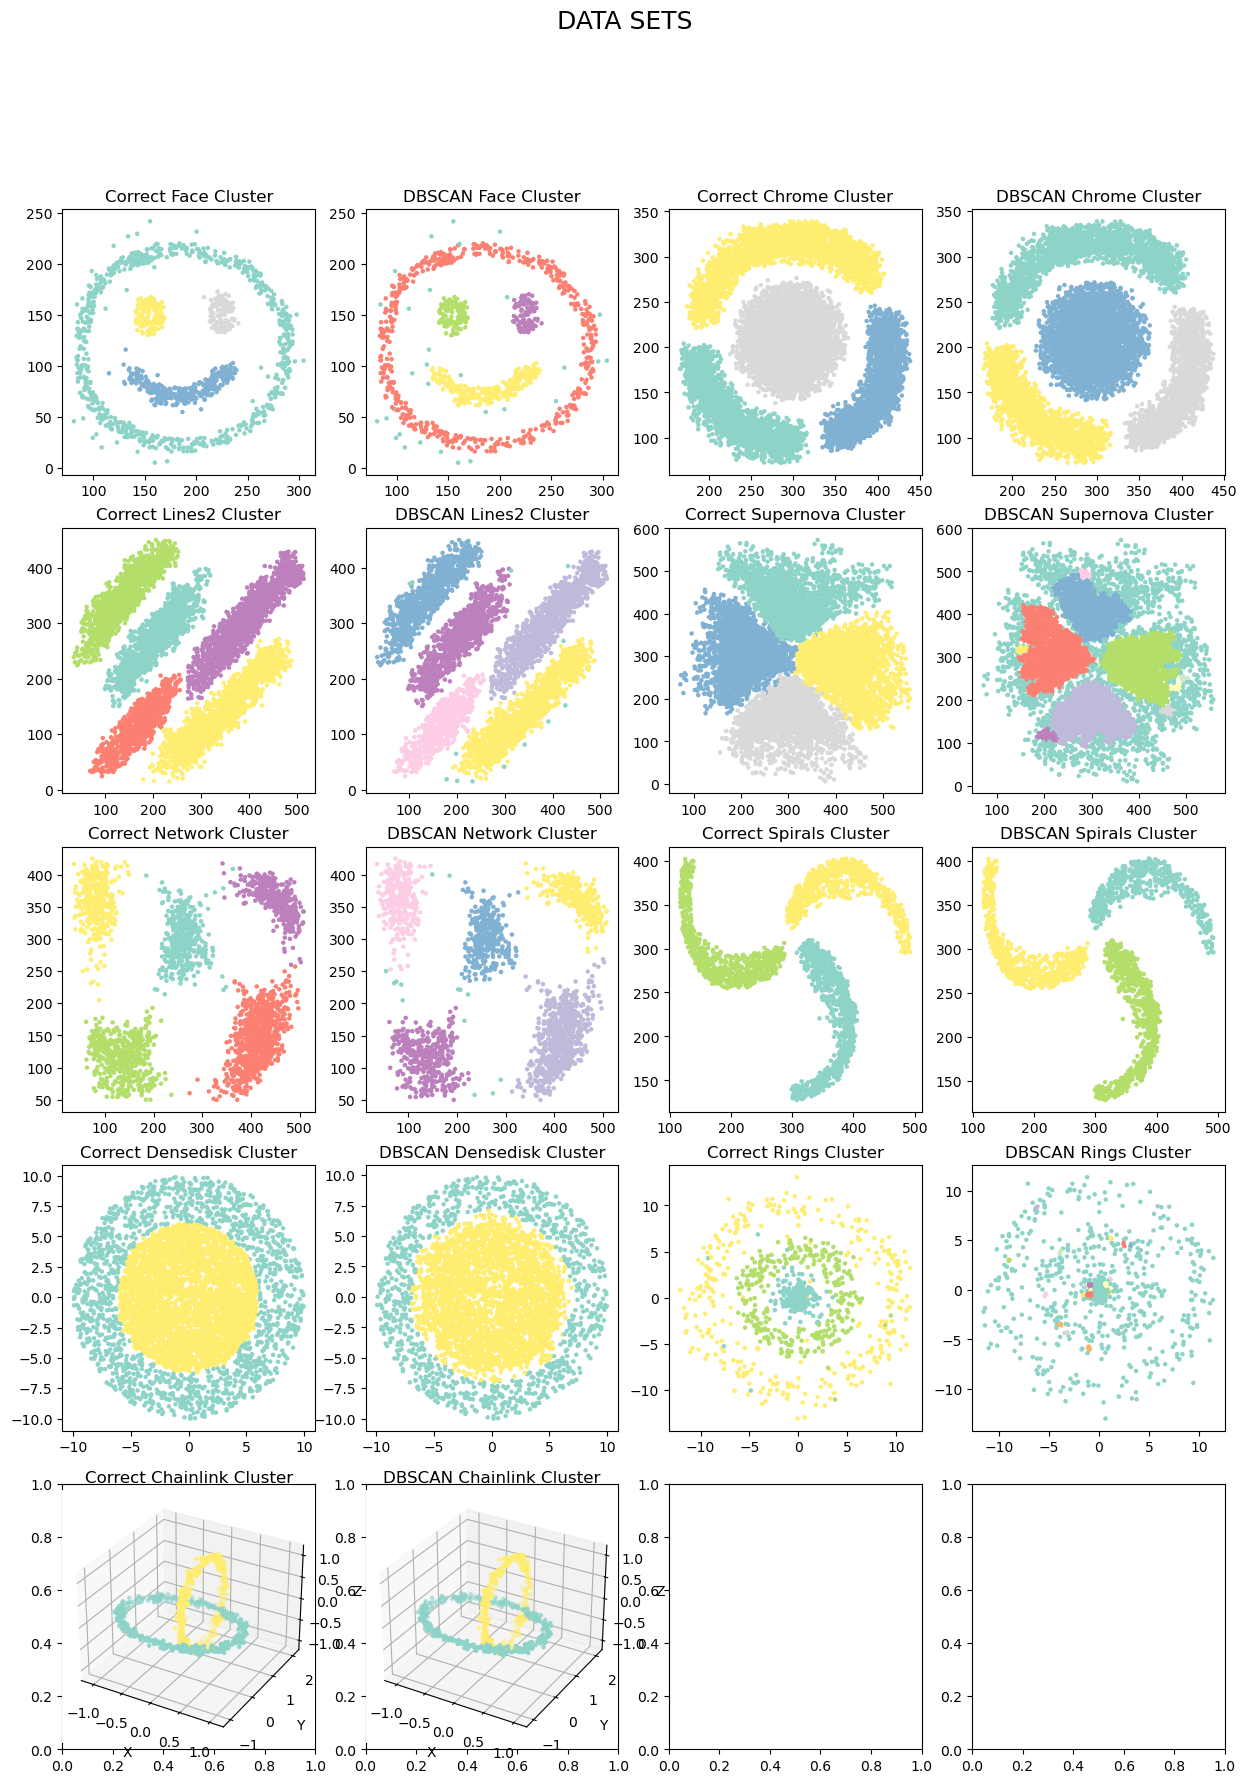

In [640]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
fig.suptitle('DATA SETS\n', size=18)

# Face Scatter Plots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=5, cmap="Set3")
axes[0, 0].set_title("Correct Face Cluster")
axes[0, 1].scatter(X_dbscan_face['x'], X_dbscan_face['y'], c=X_dbscan_face['cluster'], s=5, cmap="Set3")
axes[0, 1].set_title("DBSCAN Face Cluster")

# Chrome Scatter Plots
axes[0, 2].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=5, cmap="Set3")
axes[0, 2].set_title("Correct Chrome Cluster")
axes[0, 3].scatter(X_dbscan_chrome['x'], X_dbscan_chrome['y'], c=X_dbscan_chrome['cluster'], s=5, cmap="Set3")
axes[0, 3].set_title("DBSCAN Chrome Cluster")

# Lines2 Scatter Plots
axes[1, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=5, cmap="Set3")
axes[1, 0].set_title("Correct Lines2 Cluster")
axes[1, 1].scatter(X_dbscan_lines2['x'], X_dbscan_lines2['y'], c=X_dbscan_lines2['cluster'], s=5, cmap="Set3")
axes[1, 1].set_title("DBSCAN Lines2 Cluster")

# Supernova Scatter Plots
axes[1, 2].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=5, cmap="Set3")
axes[1, 2].set_title("Correct Supernova Cluster")
axes[1, 3].scatter(X_dbscan_supernova['x'], X_dbscan_supernova['y'], c=X_dbscan_supernova['cluster'], s=5, cmap="Set3")
axes[1, 3].set_title("DBSCAN Supernova Cluster")

# Network Scatter Plots
axes[2, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=5, cmap="Set3")
axes[2, 0].set_title("Correct Network Cluster")
axes[2, 1].scatter(X_dbscan_network['x'], X_dbscan_network['y'], c=X_dbscan_network['cluster'], s=5, cmap="Set3")
axes[2, 1].set_title("DBSCAN Network Cluster")

# Spirals Scatter Plots
axes[2, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=5, cmap="Set3")
axes[2, 2].set_title("Correct Spirals Cluster")
axes[2, 3].scatter(X_dbscan_spirals['x'], X_dbscan_spirals['y'], c=X_dbscan_spirals['cluster'], s=5, cmap="Set3")
axes[2, 3].set_title("DBSCAN Spirals Cluster")

# Densedisk Scatter Plots
axes[3, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=5, cmap="Set3")
axes[3, 0].set_title("Correct Densedisk Cluster")
axes[3, 1].scatter(X_dbscan_densedisk['x'], X_dbscan_densedisk['y'], c=X_dbscan_densedisk['cluster'], s=5, cmap="Set3")
axes[3, 1].set_title("DBSCAN Densedisk Cluster")

# Rings Scatter Plots
axes[3, 2].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=5, cmap="Set3")
axes[3, 2].set_title("Correct Rings Cluster")
axes[3, 3].scatter(X_dbscan_rings['x'], X_dbscan_rings['y'], c=X_dbscan_rings['cluster'], s=5, cmap="Set3")
axes[3, 3].set_title("DBSCAN Rings Cluster")

# Chainlink 3D Scatter Plots
ax3d_correct = fig.add_subplot(5, 4, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=5)
ax3d_correct.set_title("Correct Chainlink Cluster")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_dbscan = fig.add_subplot(5, 4, 18, projection='3d')
ax3d_dbscan.scatter(X_dbscan_chainlink['x'], X_dbscan_chainlink['y'], X_dbscan_chainlink['z'], c=X_dbscan_chainlink['cluster'], cmap="Set3", s=5)
ax3d_dbscan.set_title("DBSCAN Chainlink Cluster")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

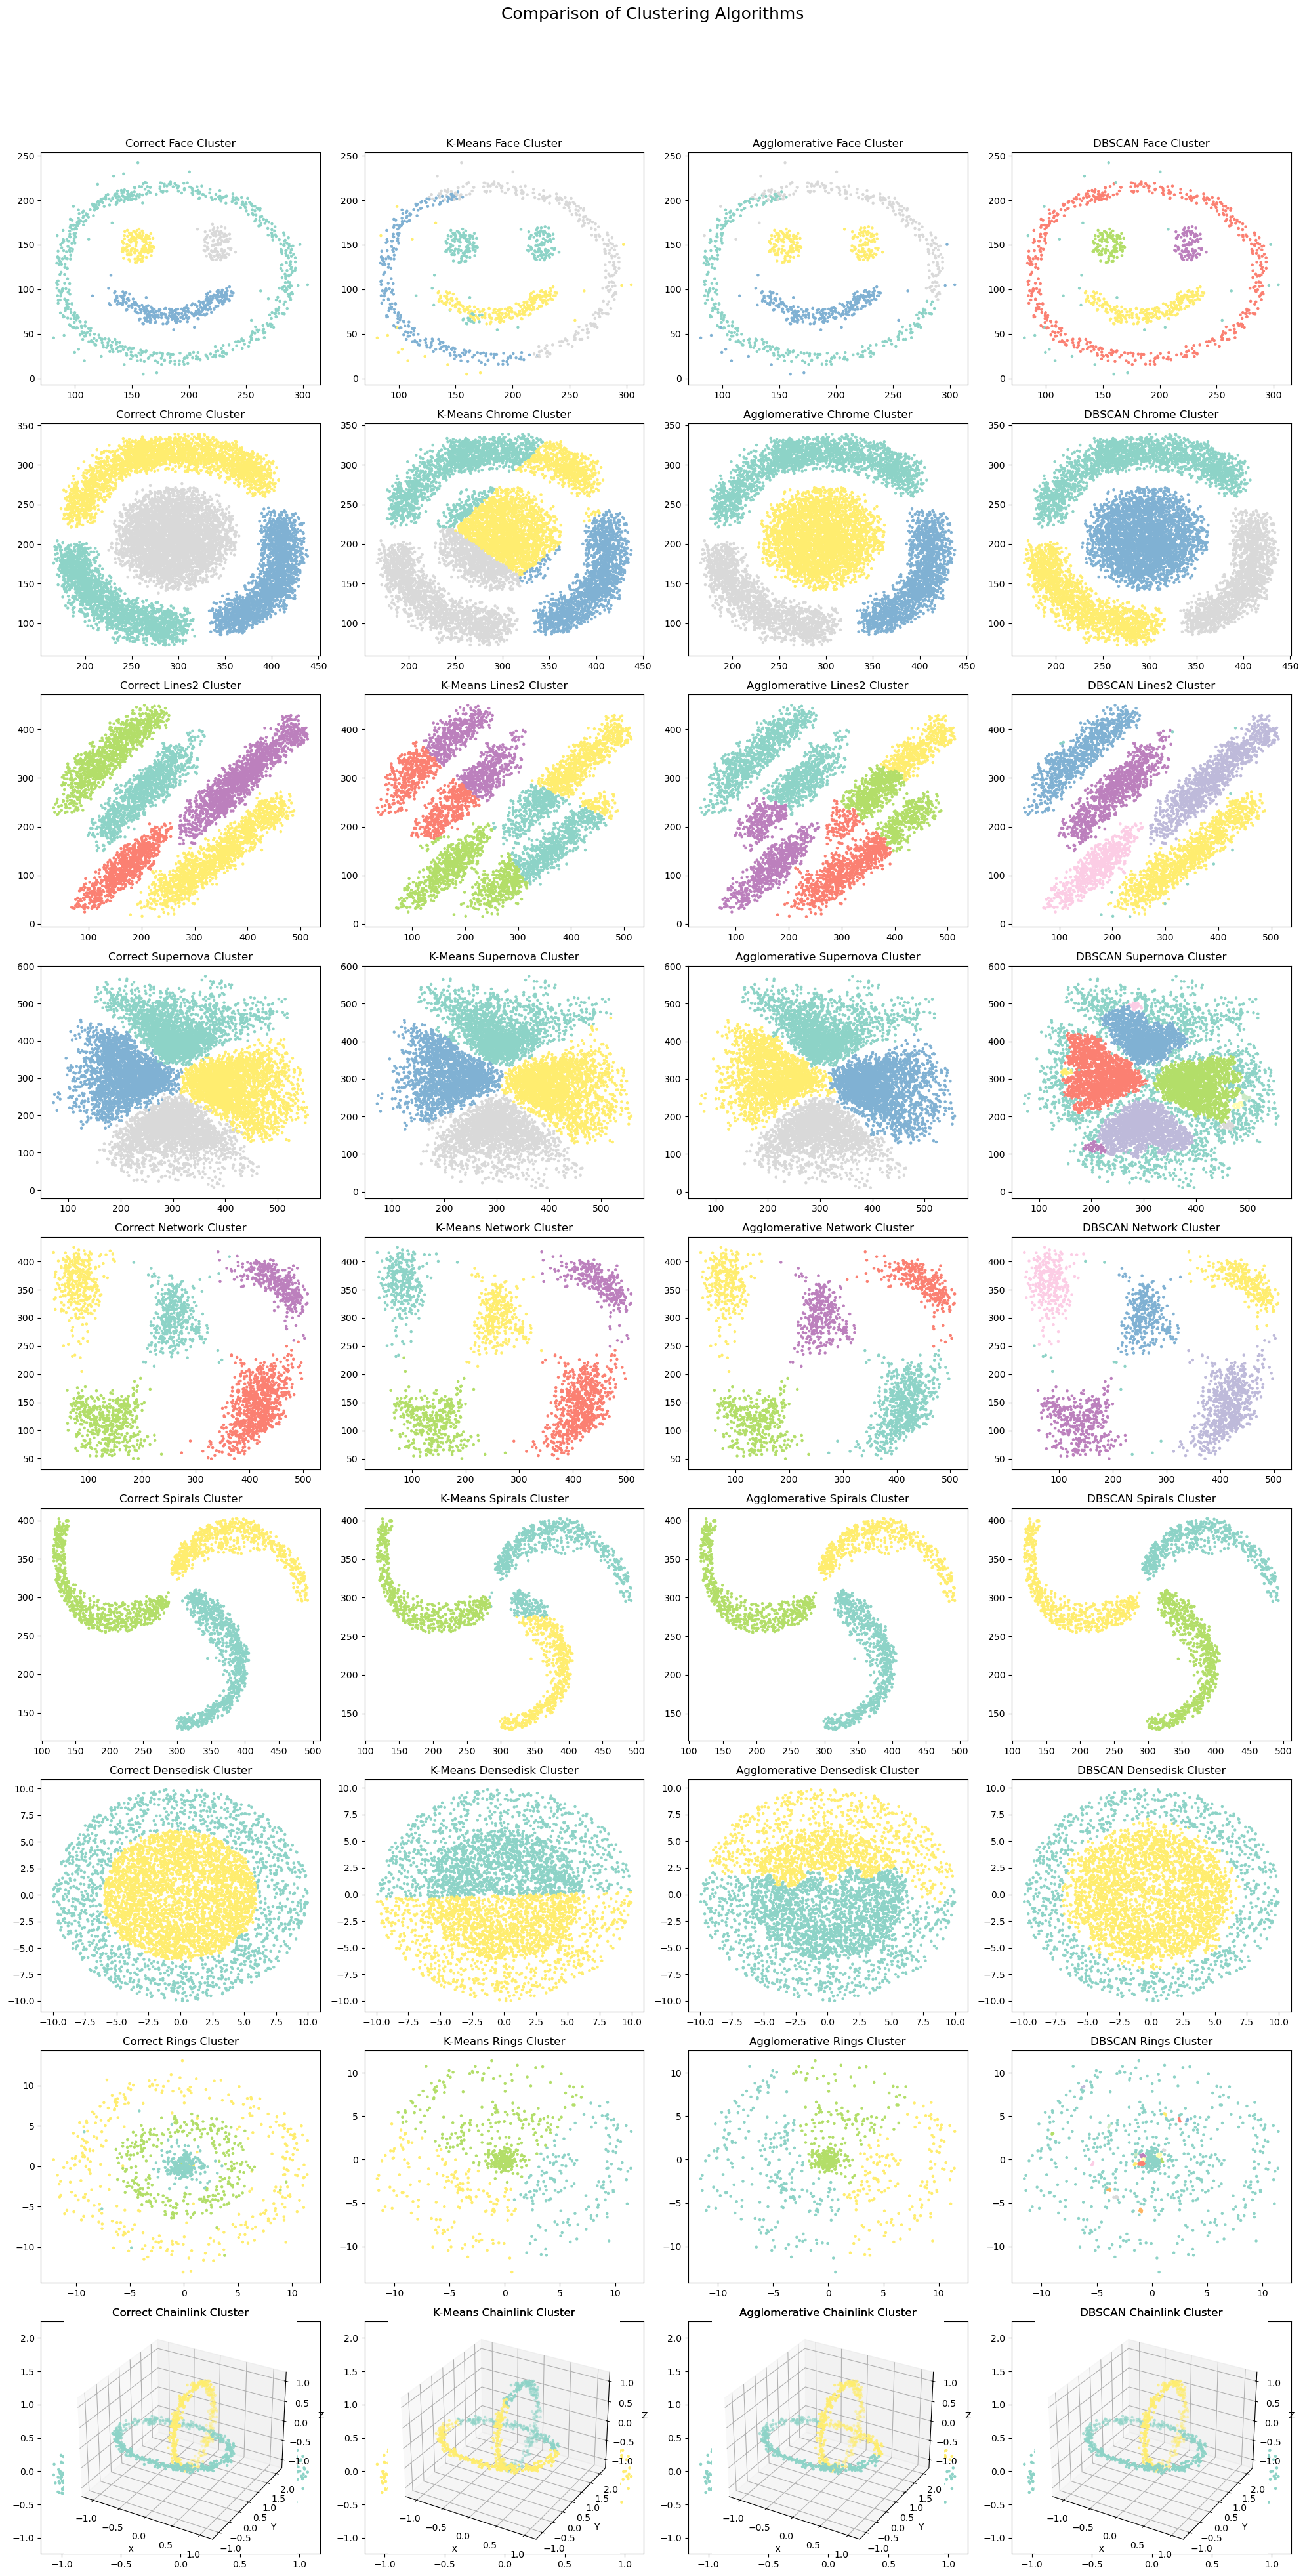

In [644]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 40))
fig.suptitle('Comparison of Clustering Algorithms\n', size=18)

datasets = [
    (face_df, X_k_means_face, X_agg_face, X_dbscan_face, "Face"),
    (chrome_df, X_k_means_chrome, X_agg_chrome, X_dbscan_chrome, "Chrome"),
    (lines2_df, X_k_means_lines2, X_agg_lines2, X_dbscan_lines2, "Lines2"),
    (supernova_df, X_k_means_supernova, X_agg_supernova, X_dbscan_supernova, "Supernova"),
    (network_df, X_k_means_network, X_agg_network, X_dbscan_network, "Network"),
    (spirals_df, X_k_means_spirals, X_agg_spirals, X_dbscan_spirals, "Spirals"),
    (densedisk_df, X_k_means_densedisk, X_agg_densedisk, X_dbscan_densedisk, "Densedisk"),
    (rings_df, X_k_means_rings, X_agg_rings, X_dbscan_rings, "Rings"),
    (chainlink_df, X_k_means_chainlink, X_agg_chainlink, X_dbscan_chainlink, "Chainlink")
]

for i, (correct_df, kmeans_df, agg_df, dbscan_df, title) in enumerate(datasets):
    # Correct clusters
    axes[i, 0].scatter(correct_df['x'], correct_df['y'], c=correct_df['color'], s=5, cmap="Set3")
    axes[i, 0].set_title(f"Correct {title} Cluster")
    
    # K-means clusters
    axes[i, 1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['cluster'], s=5, cmap="Set3")
    axes[i, 1].set_title(f"K-Means {title} Cluster")
    
    # Agglomerative clusters
    axes[i, 2].scatter(agg_df['x'], agg_df['y'], c=agg_df['cluster'], s=5, cmap="Set3")
    axes[i, 2].set_title(f"Agglomerative {title} Cluster")
    
    # DBSCAN clusters
    axes[i, 3].scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['cluster'], s=5, cmap="Set3")
    axes[i, 3].set_title(f"DBSCAN {title} Cluster")

# 3D plot for Chainlink dataset
ax3d_correct = fig.add_subplot(9, 4, 33, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=5)
ax3d_correct.set_title("Correct Chainlink Cluster")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(9, 4, 34, projection='3d')
ax3d_kmeans.scatter(X_k_means_chainlink['x'], X_k_means_chainlink['y'], X_k_means_chainlink['z'], c=X_k_means_chainlink['cluster'], cmap="Set3", s=5)
ax3d_kmeans.set_title("K-Means Chainlink Cluster")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

ax3d_agg = fig.add_subplot(9, 4, 35, projection='3d')
ax3d_agg.scatter(X_agg_chainlink['x'], X_agg_chainlink['y'], X_agg_chainlink['z'], c=X_agg_chainlink['cluster'], cmap="Set3", s=5)
ax3d_agg.set_title("Agglomerative Chainlink Cluster")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

ax3d_dbscan = fig.add_subplot(9, 4, 36, projection='3d')
ax3d_dbscan.scatter(X_dbscan_chainlink['x'], X_dbscan_chainlink['y'], X_dbscan_chainlink['z'], c=X_dbscan_chainlink['cluster'], cmap="Set3", s=5)
ax3d_dbscan.set_title("DBSCAN Chainlink Cluster")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



